# Part 1: Preprocessing

In [7]:
import string

text = ""

for filename in ['bible.txt', 'quran.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
def tokenizer(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    token = text.split()
    return token

tokens = tokenizer(text)

In [35]:
# Calculate term frequency
term_freq = {}
for term in tokens:
    if term in term_freq:
        term_freq[term] += 1
    else:
        term_freq[term] = 1

# Descending order
term_freq_desc = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)

rank = []
freq = []
for i in term_freq_desc:
    rank.append(i[0])
    freq.append(i[1])

[72143,
 57540,
 38509,
 17242,
 14958,
 14943,
 12735,
 11121,
 10699,
 10439,
 10202,
 9840,
 9507,
 9418,
 9000,
 8780,
 8569,
 8327,
 8277,
 7760,
 7714,
 7215,
 7073,
 6129,
 5474,
 5392,
 5285,
 5213,
 5039,
 4928,
 4902,
 4827,
 4683,
 4613,
 4600,
 4552,
 4505,
 4352,
 4112,
 3983,
 3826,
 3673,
 3672,
 3350,
 3260,
 3120,
 3084,
 2957,
 2903,
 2786,
 2739,
 2685,
 2666,
 2649,
 2608,
 2567,
 2505,
 2466,
 2435,
 2430,
 2342,
 2336,
 2277,
 2264,
 2263,
 2227,
 2219,
 2209,
 2195,
 2147,
 2144,
 2080,
 2059,
 1998,
 1917,
 1898,
 1896,
 1868,
 1833,
 1821,
 1815,
 1766,
 1745,
 1732,
 1725,
 1667,
 1640,
 1639,
 1623,
 1616,
 1579,
 1556,
 1517,
 1470,
 1467,
 1423,
 1408,
 1365,
 1363,
 1360,
 1356,
 1330,
 1326,
 1315,
 1310,
 1262,
 1248,
 1201,
 1181,
 1165,
 1161,
 1121,
 1110,
 1105,
 1103,
 1081,
 1070,
 1062,
 1062,
 1057,
 1043,
 1035,
 1033,
 1028,
 1023,
 1022,
 1008,
 1007,
 1004,
 999,
 985,
 985,
 981,
 964,
 952,
 943,
 938,
 916,
 908,
 897,
 887,
 872,
 859,
 8

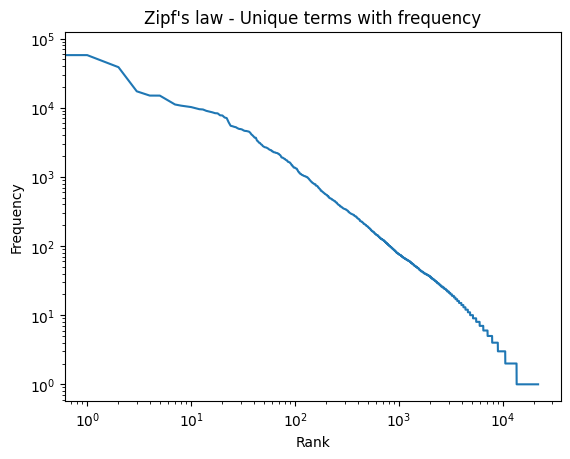

In [38]:
import matplotlib.pyplot as plt

plt.plot(rank, freq)
plt.title("Zipf's law - Unique terms with frequency")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

# Stopping - Remove English stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = []
for word in tokens:
    if word not in stop_words:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:200])

In [ ]:
# Save preprocessed tokens to new files
with open('bible_preprocessed.txt', 'w', encoding='utf-8') as bible_file:
    bible_file.write(" ".join(stemmed_tokens))

with open('quran_preprocessed.txt', 'w', encoding='utf-8') as quran_file:
    quran_file.write(" ".join(stemmed_tokens))

Compare the processed file to the new file. Are there any surprises? Discuss
what kind of modifications in preprocessing could be applied. For example:
- Additional words/terms to be filtered out
- Special tokenization
- Additional normalization to some terms

In [9]:
example = "politician: politicians, politics policy"
tokensEx = tokenizer(example)
tokensEx

['politician', 'politicians', 'politics', 'policy']

# Part 2: Text Laws

In [4]:
import matplotlib.pyplot as plt

# Calculate term frequency
term_freq = {}
for term in stemmed_tokens:
    if term in term_freq:
        term_freq[term] += 1
    else:
        term_freq[term] = 1